In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import fitparse
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
src_file = '/Users/hasannagib/Dropbox/Apps/WahooFitness/2020-09-05-115751-FITNESS FB34-27-0.fit'
fitfile = fitparse.FitFile(src_file)

In [11]:
# Get all data messages that are of type record
data = []
for record in fitfile.get_messages('record'):
    records = {}
    for record_data in record: 
        if record_data.name in ['heart_rate', 'timestamp']:
            records[record_data.name] = record_data.value
    data.append(records)
        

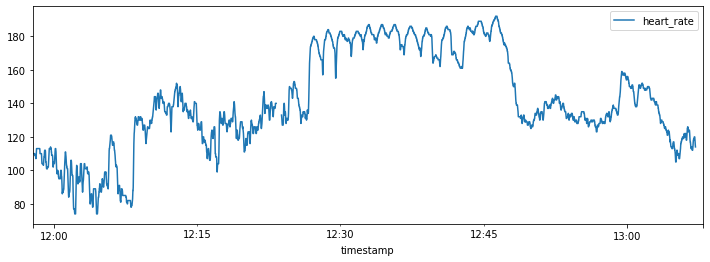

In [30]:
df = pd.DataFrame(data).set_index('timestamp')
df.plot(figsize=(12,4));

In [73]:
# 1-minute recovery
df['2020-09-05 12:46:23':'2020-09-05 12:47:23']

,heart_rate
timestamp,
2020-09-05 12:46:23,192.0
2020-09-05 12:46:24,191.0
2020-09-05 12:46:25,191.0
2020-09-05 12:46:26,190.0
2020-09-05 12:46:27,190.0
...,...
2020-09-05 12:47:19,174.0
2020-09-05 12:47:20,174.0
2020-09-05 12:47:21,174.0


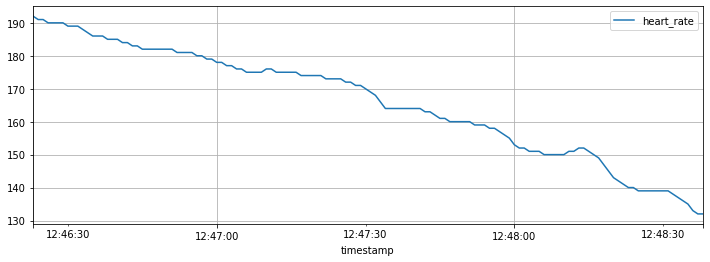

In [74]:
df['2020-09-05 12:46:23':'2020-09-05 12:48:38'].plot(figsize=(12,4));
plt.grid()

In [75]:
# Recovery rate
recovery = df['2020-09-05 12:46:23':'2020-09-05 12:48:38']
(recovery.max() - recovery.min())/(recovery.shape[0]/60)

heart_rate    26.470588
dtype: float64

In [83]:
df['hear_rate_lag'] = df[['heart_rate']].shift(60)
df['1min_rec'] = df['hear_rate_lag'] - df['heart_rate']

In [99]:
# Maximum 1 minute recovery in the last 30 minutes
df[-30*60:].max()

heart_rate       192.0
hear_rate_lag    192.0
1min_rec          34.0
dtype: float64

In [100]:
df[-30*60:].idxmax()

heart_rate      2020-09-05 12:46:14
hear_rate_lag   2020-09-05 12:47:14
1min_rec        2020-09-05 12:48:25
dtype: datetime64[ns]

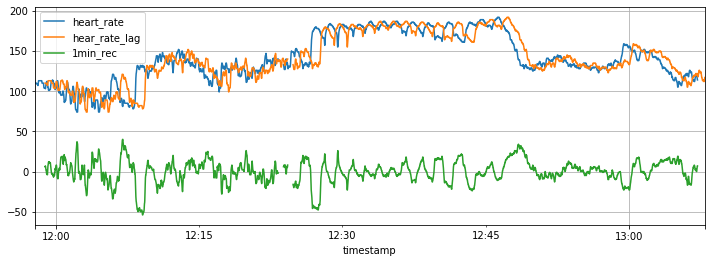

In [105]:
df.plot(figsize=(12,4));
plt.grid()